<h2> Analítica para ofertas de empleo para ingenieros en portales web en Colombia </h2>

<p style="color:blue;"> John James Culma Cadavid <br/>
     Valeria Foronda Carmona <br/>
     Sebastián Giraldo Martínez <br/>
     Diana Marcela Maya Solano <br/>
     Frank Esneider Quinchía Valencia
</p>

<p> <b> Consideraciones iniciales: </b> <br/>
    - Análisis de la demanda laboral  <br/>
    - Ofertas para ingenieros
</p>

<h3> Exploración de Portales Web de empleo </h3>

<img src="Sitios.png">

<p> <b> Hallazgos: </b> <br/>
    - Heterogeneidad en la estructura de los portales Web  <br/>
    - Campos comunes entre las ofertas <br/>
    - Información de valor contenida en párrafos <br/>
</p>

<p> <b> Decisión: </b> <br/>
    - Considerar solo las ofertas obtenidas a través de un Portal Web: Computrabajo
</p>

<p> <b> Descarga de la información: </b>  <br/>
    - De manera automatizada con un robot configurado a través de Python <br/>
    - Usando un complemento de Chrome para Web Scraper
</p>

<h3> Dificultades en la información obtenida </h3>

<img src="Computrabajo.png">

<p style="color:red;"> <b> Punto de oportunidad 1: </b>  <br/> </p>
<p> - De manera automatizada, se puede obtener la información diaria del portal <br/>
    - El modelo se puede complementar con la información de otros Portales Web
</p>

<h3> Minería de Texto </h3>

<p> <b> Análisis de texto: </b>  <br/>
    - Diccionario por concepto <br/>
    - Análisis de frecuencias en los términos <br/>
    - Agrupación de sinónimos y términos en grupos <br/>
    - Crçeación matriz de representación por concepto
</p>

<img src="Ofertas.png">

<img src="Frecuencias.png" width="300" height="300">

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext rpy2.ipython
import csv

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [48]:
ab = pd.read_csv("Ofertas.csv", sep = ';', encoding='latin-1')

# ab.head()
df1 = ab['profesion']
df2 = ab['contrato']
df3 = ab['jornada']
df4 = ab['descripcion']
df5 = ab['salario']
df6 = ab['Ciudad']
df7 = ab['Nivel educativo']
df8 = ab['años de experiencia']

In [49]:
df1 = ab['profesion']
##
## Matriz de términos del documento en Python
##
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(
    analyzer='word',        # a nivel de palabra
    lowercase=True)         # convierte a minúsculas   

##
## Aplica la función al texto
##
dtm = count_vect.fit_transform(df1.values.astype('U'))

##
## Convierte las frecuencias a 1 y 0
##
rows, cols = dtm.nonzero()
for row, col in zip(rows,cols):
    dtm[row, col] = 1;


##
## Las filas contienen los mensajes
## y las clomunas los términos
##
# dtm.shape

vocabulary = count_vect.get_feature_names()
# len(vocabulary)
vocabulary2 = pd.DataFrame(vocabulary)
vocabulary3 = vocabulary2.transpose()
vocabulary3.rename(index={0:'vocabulary'}, inplace=True)
vocabulary4 = vocabulary3.transpose()
# vocabulary4.head()

df5 = dtm.sum(axis=0)
df6 = pd.DataFrame(df5)
df6.rename(index={0:'frec'}, inplace=True)
df7 = df6.transpose()
frec = pd.concat([vocabulary4, df7], axis=1,)
frec.head()
frec1 = frec.sort_values(by='frec', ascending=False)

dtm2 = dtm.todense()
type(dtm2)
dtm3 = pd.DataFrame(dtm2)

dtm3.shape

def ingsistemas(c):
  if c[688]:
    return '1'
  else:
    return '0'

def profdesarrollador(c): 
  if c[208] or c[207] or c[612]: 
    return '1'
  else:
    return '0'

def industrial(c):
  if c[371]: 
    return '1'
  else:
    return '0'

def civil(c):
  if c[146]:
    return '1'
  else:
    return '0'

def mecanico(c):
  if c[466] or c[465] or c[471] or c[452]:
    return '1'
  else:
    return '0'

def electricista(c):
  if c[250] or c[260] or c[258] or c[251]:
    return '1'
  else:
    return '0'

def alimentos(c):
  if c[37]:
    return '1'
  else:
    return '0'

def produccion(c):
  if c[603]:
    return '1'
  else:
    return '0'

def agronomo(c):
  if c[26] or c[29]:
    return '1'
  else:
    return '0'

def telecomu(c):
  if c[733]:
    return '1'
  else:
    return '0'

def quimico(c):
  if c[631] or c[630]:
    return '1'
  else:
    return '0'

def ambiental(c):
  if c[43]:
    return '1'
  else:
    return '0'

def SST(c):
  if c[663] and c[655] and c[752] or c[529]:
    return '1'
  else:
    return '0'

def control(c):
  if c[179]:
    return '1'
  else:
    return '0'

def procesos(c):
  if c[601]:
    return '1'
  else:
    return '0'

def elec_meca(c):
  if c[256]:
    return '1'
  else:
    return '0'

def mecatron(c):
  if c[468]:
    return '1'
  else:
    return '0'

dtm3['ingsistemas'] = dtm3.apply(ingsistemas, axis=1)
dtm3['profdesarrollador'] = dtm3.apply(profdesarrollador, axis=1)
dtm3['industrial'] = dtm3.apply(industrial, axis=1)
dtm3['civil'] = dtm3.apply(civil, axis=1)
dtm3['mecanico'] = dtm3.apply(mecanico, axis=1)
dtm3['electricista'] = dtm3.apply(electricista, axis=1)
dtm3['alimentos'] = dtm3.apply(alimentos, axis=1)
dtm3['produccion'] = dtm3.apply(produccion, axis=1)
dtm3['agronomo'] = dtm3.apply(agronomo, axis=1)
dtm3['telecomu'] = dtm3.apply(telecomu, axis=1)
dtm3['quimico'] = dtm3.apply(quimico, axis=1)
dtm3['ambiental'] = dtm3.apply(ambiental, axis=1)
dtm3['SST'] = dtm3.apply(SST, axis=1)
dtm3['control'] = dtm3.apply(control, axis=1)
dtm3['procesos'] = dtm3.apply(procesos, axis=1)
dtm3['elec_meca'] = dtm3.apply(elec_meca, axis=1)
dtm3['mecatron'] = dtm3.apply(mecatron, axis=1)

final1 = dtm3.iloc[:,-17:]
final1.head()

,ingsistemas,profdesarrollador,industrial,civil,mecanico,electricista,alimentos,produccion,agronomo,telecomu,quimico,ambiental,SST,control,procesos,elec_meca,mecatron
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<p style="color:red;"> <b> Punto de oportunidad 2: </b>  <br/> </p>
<p> - Identificación de posiciones de manera dinámica <br/>
</p>

In [50]:
df2 = ab['contrato']

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(
    analyzer='word',        # a nivel de palabra
    lowercase=True)         # convierte a minúsculas   

dtm = count_vect.fit_transform(df2.values.astype('U'))

rows, cols = dtm.nonzero()
for row, col in zip(rows,cols):
    dtm[row, col] = 1;

vocabulary = count_vect.get_feature_names()
# len(vocabulary)
vocabulary2 = pd.DataFrame(vocabulary)
vocabulary3 = vocabulary2.transpose()
vocabulary3.rename(index={0:'vocabulary'}, inplace=True)
vocabulary4 = vocabulary3.transpose()
# vocabulary4.head()

df5 = dtm.sum(axis=0)
df6 = pd.DataFrame(df5)
df6.rename(index={0:'frec'}, inplace=True)
df7 = df6.transpose()
frec = pd.concat([vocabulary4, df7], axis=1,)
frec.head()
frec1 = frec.sort_values(by='frec', ascending=False)

dtm2 = dtm.todense()
type(dtm2)
dtm3 = pd.DataFrame(dtm2)

dtm3.shape

def prestserv(c):
  if c[16] and c[17]:
    return '1'
  else:
    return '0'

def obralabor(c):
  if c[10] and c[12]:
    return '1'
  else:
    return '0'

def fijo(c):
  if c[7]:
    return '1'
  else:
    return '0'

def indefinido(c):
  if c[9]:
    return '1'
  else:
    return '0'

def aprendizaje(c):
  if c[0]:
    return '1'
  else:
    return '0'

def horas(c):
  if c[8]:
    return '1'
  else:
    return '0'

def ocasional(c):
  if c[13]:
    return '1'
  else:
    return '0'

dtm3['prestserv'] = dtm3.apply(prestserv, axis=1)
dtm3['obralabor'] = dtm3.apply(obralabor, axis=1)
dtm3['indefinido'] = dtm3.apply(indefinido, axis=1)
dtm3['fijo'] = dtm3.apply(fijo, axis=1)
dtm3['aprendizaje'] = dtm3.apply(aprendizaje, axis=1)
dtm3['horas'] = dtm3.apply(horas, axis=1)
dtm3['ocasional'] = dtm3.apply(ocasional, axis=1)

final2 = dtm3.iloc[:,-7:]
# final2

In [51]:
df3 = ab['jornada']

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(
    analyzer='word',        # a nivel de palabra
    lowercase=True)         # convierte a minúsculas   

dtm = count_vect.fit_transform(df3.values.astype('U'))

rows, cols = dtm.nonzero()
for row, col in zip(rows,cols):
    dtm[row, col] = 1;

vocabulary = count_vect.get_feature_names()
# len(vocabulary)
vocabulary2 = pd.DataFrame(vocabulary)
vocabulary3 = vocabulary2.transpose()
vocabulary3.rename(index={0:'vocabulary'}, inplace=True)
vocabulary4 = vocabulary3.transpose()
# vocabulary4.head()

df5 = dtm.sum(axis=0)
df6 = pd.DataFrame(df5)
df6.rename(index={0:'frec'}, inplace=True)
df7 = df6.transpose()
frec = pd.concat([vocabulary4, df7], axis=1,)
frec.head()
frec1 = frec.sort_values(by='frec', ascending=False)

dtm2 = dtm.todense()
type(dtm2)
dtm3 = pd.DataFrame(dtm2)

dtm3.shape

def completo(c): # Se cambia el nombre de la función
  if c[2]: # Se cambia la posición del término que se necesite
    return '1'
  else:
    return '0'

def parcial(c): # Se cambia el nombre de la función
  if c[6]: # Se cambia la posición del término que se necesite
    return '1'
  else:
    return '0'

def horas(c): # Se cambia el nombre de la función
  if c[4]: # Se cambia la posición del término que se necesite
    return '1'
  else:
    return '0'

def practicas(c): # Se cambia el nombre de la función
  if c[8] or c[0]: # Se cambia la posición del término que se necesite
    return '1'
  else:
    return '0'

def casa(c): # Se cambia el nombre de la función
  if c[1]: # Se cambia la posición del término que se necesite
    return '1'
  else:
    return '0'

dtm3['jornada_completa'] = dtm3.apply(completo, axis=1) # Se le aplica la función al dtm3
dtm3['jornada_parcial'] = dtm3.apply(parcial, axis=1) # Se le aplica la función al dtm3
dtm3['jornada_horas'] = dtm3.apply(horas, axis=1) # Se le aplica la función al dtm3
dtm3['jornada_practicas'] = dtm3.apply(practicas, axis=1) # Se le aplica la función al dtm3
dtm3['jornada_casa'] = dtm3.apply(practicas, axis=1) # Se le aplica la función al dtm3

final3 = dtm3.iloc[:,-5:]
# final3

In [53]:
df4 = ab['descripcion']

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(
    analyzer='word',        # a nivel de palabra
    lowercase=True)         # convierte a minúsculas   

dtm = count_vect.fit_transform(df4.values.astype('U'))

rows, cols = dtm.nonzero()
for row, col in zip(rows,cols):
    dtm[row, col] = 1;

vocabulary = count_vect.get_feature_names()
# len(vocabulary)
vocabulary2 = pd.DataFrame(vocabulary)
vocabulary3 = vocabulary2.transpose()
vocabulary3.rename(index={0:'vocabulary'}, inplace=True)
vocabulary4 = vocabulary3.transpose()
# vocabulary4.head()

df5 = dtm.sum(axis=0)
df6 = pd.DataFrame(df5)
df6.rename(index={0:'frec'}, inplace=True)
df7 = df6.transpose()
frec = pd.concat([vocabulary4, df7], axis=1,)
frec.head()
frec1 = frec.sort_values(by='frec', ascending=False)

dtm2 = dtm.todense()
type(dtm2)
dtm3 = pd.DataFrame(dtm2)

dtm3.shape

def equipo(c):
  if c[3413] > 0:
    return '1'
  else:
    return '0'

def proyecto(c):
  if c[6985] > 0 or c[6984] > 0 or c[6977]:
    return '1'
  else:
    return '0'

def sql(c):
  if c[7979] > 0:
    return '1'
  else:
    return '0'

def mysql(c):
  if c[5775] > 0:
    return '1'
  else:
    return '0'

def postgresql(c):
  if c[6629] > 0 or c[6606]:
    return '1'
  else:
    return '0'

def nosql(c):
  if c[5928]:
    return '1'
  else:
    return '0'

def plsql(c):
  if c[6556]:
    return '1'
  else:
    return '0'

def mssql(c):
  if c[5727]:
    return '1'
  else:
    return '0'

def sqlserver(c):
  if c[7981]:
    return '1'
  else:
    return '0'

def sqlserver(c):
  if c[7981]:
    return '1'
  else:
    return '0'

def programacion(c):
  if c[6879] or c[6876] or c[6891] or [6887] or c[6885] or c[6880] or c[6890] or c[6883] or c[6888] or c[6889] or c[6882] or c[6881]:
    return '1'
  else:
    return '0'

def redes(c):
  if c[7213]:
    return '1'
  else:
    return '0'

def tecnologia(c):
  if c[8192] or c[8190] or c[8195] or c[8191] or c[8203] or c[8194] or c[8196] or c[8197] or c[8198] or c[8201] or c[8202] or c[8193]:
    return '1'
  else:
    return '0'

def java(c):
  if c[4899]:
    return '1'
  else:
    return '0'

def javascript(c):
  if c[4901] or c[4902] or c[2156]:
    return '1'
  else:
    return '0'

def javaee(c):
  if c[4900]:
    return '1'
  else:
    return '0'

def javaserver(c):
  if c[4903]:
    return '1'
  else:
    return '0'

def net(c):
  if c[5848]:
    return '1'
  else:
    return '0'

def web(c):
  if c[8856] or c[8862]:
    return '1'
  else:
    return '0'

def weblogic(c):
  if c[8859]:
    return '1'
  else:
    return '0'

def webpack(c):
  if c[8861]:
    return '1'
  else:
    return '0'

def webservice(c):
  if c[8864] or c[8863]:
    return '1'
  else:
    return '0'

def webmaster(c):
  if c[779]:
    return '1'
  else:
    return '0'

def cliente(c):
  if c[1885] or c[1883] or c[1882] or c[1884] or c[5822] or c[2574] or c[2575]:
    return '1'
  else:
    return '0'

def aplicaciones(c):
  if c[1002] or c[1003] or c[1004] or c[1041] or c[1037] or c[1040] or c[1039] or c[1011] or c[1010]:
    return '1'
  else:
    return '0'

def linux(c):
  if c[5123]:
    return '1'
  else:
    return '0'

def excel(c):
  if c[3649] or c[3655]:
    return '1'
  else:
    return '0'

def comisiones(c):
  if c[1981] or c[1472] or c[1474] or c[1473]:
    return '1'
  else:
    return '0'

def oracle(c):
  if c[6134]:
    return '1'
  else:
    return '0'

def comercial(c):
  if c[1964] or c[1965] or c[8689] or c[8687] or c[6775]:
    return '1'
  else:
    return '0'

def php(c):
  if c[6460] or c[6461]:
    return '1'
  else:
    return '0'

def sap(c):
  if c[7612]:
    return '1'
  else:
    return '0'

def ingles(c):
  if c[4628] or c[4627] or c[3326]:
    return '1'
  else:
    return '0'

def automatizacion(c):
  if c[1261] or c[1264] or c[1268] or c[1265] or c[1263] or c[1267] or c[1260] or c[1266] or c[126]:
    return '1'
  else:
    return '0'

def desarrollador(c):
  if c[2737] or c[2738]:
    return '1'
  else:
    return '0'

def windows(c):
  if c[8876]:
    return '1'
  else:
    return '0'

def microsoft(c):
  if c[5563] or c[5562]:
    return '1'
  else:
    return '0'

def office(c):
  if c[6037] or c[6045]:
    return '1'
  else:
    return '0'

def wan(c):
  if c[8847]:
    return '1'
  else:
    return '0'

def lan(c):
  if c[5008]:
    return '1'
  else:
    return '0'

def wlan(c):
  if c[8882]:
    return '1'
  else:
    return '0'

def javascript(c):
  if c[4901] or c[4902] or c[2156]:
    return '1'
  else:
    return '0'

def telecomunicaciones(c):
  if c[8217] or c[8215] or c[8216]:
    return '1'
  else:
    return '0'

def comunicaciones(c):
  if c[2071] or c[2074] or c[2075] or c[2082] or c[2081] or c[2073] or c[2072]:
    return '1'
  else:
    return '0'

def autocad(c):
  if c[1247]:
    return '1'
  else:
    return '0'

def html(c):
  if c[4393] or c[4394] or c[4395]:
    return '1'
  else:
    return '0'

def scrum(c):
  if c[7653]:
    return '1'
  else:
    return '0'

def liderazgo(c):
  if c[5097] or c[5098] or c[5099] or c[5100] or c[5101]:
    return '1'
  else:
    return '0'

def costos(c):
  if c[2418] or c[2417] or c[2415] or c[2416]:
    return '1'
  else:
    return '0'

def iso(c):
  if c[4867] or c[4869] or c[4870] or c[4873] or c[4868] or c[4871] or c[4872]:
    return '1'
  else:
    return '0'

def presupuestos(c):
  if c[6768] or c[6767] or c[6764] or c[6765] or c[6766] or c[6769] or c[6771]:
    return '1'
  else:
    return '0'

def ccna(c):
  if c[1735]:
    return '1'
  else:
    return '0'

dtm3['Trab.equip'] = dtm3.apply(equipo, axis=1)
dtm3['Proyectos'] = dtm3.apply(proyecto, axis=1)
dtm3['sql'] = dtm3.apply(sql, axis=1)
dtm3['mysql'] = dtm3.apply(mysql, axis=1)
dtm3['postgresql'] = dtm3.apply(postgresql, axis=1)
dtm3['nosql'] = dtm3.apply(nosql, axis=1)
dtm3['plsql'] = dtm3.apply(plsql, axis=1)
dtm3['mssql'] = dtm3.apply(mssql, axis=1)
dtm3['sqlserver'] = dtm3.apply(sqlserver, axis=1)
dtm3['programacion'] = dtm3.apply(programacion, axis=1)
dtm3['redes'] = dtm3.apply(redes, axis=1)
dtm3['tecnologia'] = dtm3.apply(tecnologia, axis=1)
dtm3['java'] = dtm3.apply(java, axis=1)
dtm3['javascript'] = dtm3.apply(javascript, axis=1)
dtm3['javaee'] = dtm3.apply(javaee, axis=1)
dtm3['javaeserver'] = dtm3.apply(javaserver, axis=1)
dtm3['net'] = dtm3.apply(net, axis=1)
dtm3['web'] = dtm3.apply(web, axis=1)
dtm3['weblogic'] = dtm3.apply(weblogic, axis=1)
dtm3['webpack'] = dtm3.apply(webpack, axis=1)
dtm3['webservice'] = dtm3.apply(webservice, axis=1)
dtm3['webmaster'] = dtm3.apply(webmaster, axis=1)
dtm3['cliente'] = dtm3.apply(cliente, axis=1)
dtm3['aplicaciones'] = dtm3.apply(aplicaciones, axis=1)
dtm3['linux'] = dtm3.apply(linux, axis=1)
dtm3['excel'] = dtm3.apply(excel, axis=1)
dtm3['comisiones'] = dtm3.apply(comisiones, axis=1)
dtm3['oracle'] = dtm3.apply(oracle, axis=1)
dtm3['comercial'] = dtm3.apply(oracle, axis=1)
dtm3['php'] = dtm3.apply(php, axis=1)
dtm3['sap'] = dtm3.apply(sap, axis=1)
dtm3['ingles'] = dtm3.apply(ingles, axis=1)
dtm3['automatizacion'] = dtm3.apply(automatizacion, axis=1)
dtm3['desarrollador'] = dtm3.apply(desarrollador, axis=1)
dtm3['windows'] = dtm3.apply(windows, axis=1)
dtm3['microsoft'] = dtm3.apply(microsoft, axis=1)
dtm3['office'] = dtm3.apply(office, axis=1)
dtm3['wan'] = dtm3.apply(wan, axis=1)
dtm3['lan'] = dtm3.apply(lan, axis=1)
dtm3['wlan'] = dtm3.apply(wlan, axis=1)
dtm3['javascript'] = dtm3.apply(javascript, axis=1)
dtm3['telecomunicaciones'] = dtm3.apply(telecomunicaciones, axis=1)
dtm3['comunicaciones'] = dtm3.apply(comunicaciones, axis=1)
dtm3['autocad'] = dtm3.apply(comunicaciones, axis=1)
dtm3['html'] = dtm3.apply(html, axis=1)
dtm3['scrum'] = dtm3.apply(scrum, axis=1)
dtm3['liderazgo'] = dtm3.apply(liderazgo, axis=1)
dtm3['costos'] = dtm3.apply(costos, axis=1)
dtm3['iso'] = dtm3.apply(iso, axis=1)
dtm3['presupuestos'] = dtm3.apply(presupuestos, axis=1)
dtm3['ccna'] = dtm3.apply(ccna, axis=1)

final4 = dtm3.iloc[:,-50:]
final4.head()

,Trab.equip,Proyectos,sql,mysql,postgresql,nosql,plsql,mssql,sqlserver,programacion,...,telecomunicaciones,comunicaciones,autocad,html,scrum,liderazgo,costos,iso,presupuestos,ccna
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df6 = ab['Ciudad']

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(
    analyzer='word',        # a nivel de palabra
    lowercase=True)         # convierte a minúsculas   

dtm = count_vect.fit_transform(df6.values.astype('U'))

rows, cols = dtm.nonzero()
for row, col in zip(rows,cols):
    dtm[row, col] = 1;

vocabulary = count_vect.get_feature_names()
# len(vocabulary)
vocabulary2 = pd.DataFrame(vocabulary)
vocabulary3 = vocabulary2.transpose()
vocabulary3.rename(index={0:'vocabulary'}, inplace=True)
vocabulary4 = vocabulary3.transpose()
# vocabulary4.head()

df5 = dtm.sum(axis=0)
df6 = pd.DataFrame(df5)
df6.rename(index={0:'frec'}, inplace=True)
df7 = df6.transpose()
frec = pd.concat([vocabulary4, df7], axis=1,)
frec.head()
frec1 = frec.sort_values(by='frec', ascending=False)

dtm2 = dtm.todense()
type(dtm2)
dtm3 = pd.DataFrame(dtm2)

dtm3.shape

def bogota(c): # Se cambia el nombre de la función
  if c[16]: # Se cambia la posición del término que se necesite
    return '1'
  else:
    return '0'

def medellin(c): # Se cambia el nombre de la función
  if c[81]: # Se cambia la posición del término que se necesite
    return '1'
  else:
    return '0'

def cali(c): # Se cambia el nombre de la función
  if c[23]: # Se cambia la posición del término que se necesite
    return '1'
  else:
    return '0'

def barranquilla(c): # Se cambia el nombre de la función
  if c[12]: # Se cambia la posición del término que se necesite
    return '1'
  else:
    return '0'

def bucaramanga(c): # Se cambia el nombre de la función
  if c[18]: # Se cambia la posición del término que se necesite
    return '1'
  else:
    return '0'

def pereira(c): # Se cambia el nombre de la función
  if c[92]: # Se cambia la posición del término que se necesite
    return '1'
  else:
    return '0'

def cartagena(c): # Se cambia el nombre de la función
  if c[27] or c[65]: # Se cambia la posición del término que se necesite
    return '1'
  else:
    return '0'

def villavicencio(c): # Se cambia el nombre de la función
  if c[131]: # Se cambia la posición del término que se necesite
    return '1'
  else:
    return '0'

def tocancipa(c): # Se cambia el nombre de la función
  if c[120]: # Se cambia la posición del término que se necesite
    return '1'
  else:
    return '0'

def funza(c): # Se cambia el nombre de la función
  if c[50]: # Se cambia la posición del término que se necesite
    return '1'
  else:
    return '0'

dtm3['ciudad_bogota'] = dtm3.apply(bogota, axis=1) # Se le aplica la función al dtm3
dtm3['ciudad_medellin'] = dtm3.apply(medellin, axis=1) # Se le aplica la función al dtm3
dtm3['ciudad_cali'] = dtm3.apply(cali, axis=1) # Se le aplica la función al dtm3
dtm3['ciudad_barranquilla'] = dtm3.apply(barranquilla, axis=1) # Se le aplica la función al dtm3
dtm3['ciudad_bucaramanga'] = dtm3.apply(bucaramanga, axis=1) # Se le aplica la función al dtm3
dtm3['ciudad_pereira'] = dtm3.apply(pereira, axis=1) # Se le aplica la función al dtm3
dtm3['ciudad_cartagena'] = dtm3.apply(cartagena, axis=1) # Se le aplica la función al dtm3
dtm3['ciudad_villavicencio'] = dtm3.apply(villavicencio, axis=1) # Se le aplica la función al dtm3
dtm3['ciudad_tocancipa'] = dtm3.apply(tocancipa, axis=1) # Se le aplica la función al dtm3
dtm3['ciudad_funza'] = dtm3.apply(funza, axis=1) # Se le aplica la función al dtm3

final6 = dtm3.iloc[:,-10:]
# final6

In [55]:
df7 = ab['Nivel educativo']

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(
    analyzer='word',        # a nivel de palabra
    lowercase=True)         # convierte a minúsculas   

dtm = count_vect.fit_transform(df7.values.astype('U'))

rows, cols = dtm.nonzero()
for row, col in zip(rows,cols):
    dtm[row, col] = 1;

vocabulary = count_vect.get_feature_names()
# len(vocabulary)
vocabulary2 = pd.DataFrame(vocabulary)
vocabulary3 = vocabulary2.transpose()
vocabulary3.rename(index={0:'vocabulary'}, inplace=True)
vocabulary4 = vocabulary3.transpose()
# vocabulary4.head()

df5 = dtm.sum(axis=0)
df6 = pd.DataFrame(df5)
df6.rename(index={0:'frec'}, inplace=True)
df7 = df6.transpose()
frec = pd.concat([vocabulary4, df7], axis=1,)
frec.head()
frec1 = frec.sort_values(by='frec', ascending=False)

dtm2 = dtm.todense()
type(dtm2)
dtm3 = pd.DataFrame(dtm2)

def tecnologo(c): # Se cambia el nombre de la función
  if c[8]: # Se cambia la posición del término que se necesite
    return '1'
  else:
    return '0'

def especiali(c): 
  if c[3]: 
    return '1'
  else:
    return '0'

def profesional(c): 
  if c[7]: 
    return '1'
  else:
    return '0'

def tecnico(c): 
  if c[9]: 
    return '1'
  else:
    return '0'

def maestria(c): 
  if c[4]: 
    return '1'
  else:
    return '0'

def doctorado(c): 
  if c[1]: 
    return '1'
  else:
    return '0'

dtm3['tecnologo'] = dtm3.apply(tecnologo, axis=1) # Se le aplica la función al dtm3
dtm3['especiali'] = dtm3.apply(especiali, axis=1)
dtm3['profesional'] = dtm3.apply(profesional, axis=1)
dtm3['tecnico'] = dtm3.apply(tecnico, axis=1)
dtm3['maestria'] = dtm3.apply(maestria, axis=1)
dtm3['doctorado'] = dtm3.apply(doctorado, axis=1)

final7 = dtm3.iloc[:,-6:]
# final7

In [56]:
final5 = pd.DataFrame(ab['salario'])
final8 = pd.DataFrame(ab['años de experiencia'])
final9 = pd.DataFrame(ab['Fecha_Publicacion'])

In [57]:
listo = pd.concat([final1, final2, final3, final4, final5, final6, final7, final8, final9], axis=1,)
listo.head()
# listo['salario'].dtype
# ab['Fecha_Publicacion'].dtype

,ingsistemas,profdesarrollador,industrial,civil,mecanico,electricista,alimentos,produccion,agronomo,telecomu,...,ciudad_tocancipa,ciudad_funza,tecnologo,especiali,profesional,tecnico,maestria,doctorado,años de experiencia,Fecha_Publicacion
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2.0,10/07/2019
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2.0,11/07/2019
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2.0,10/07/2019
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1.0,12/07/2019
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,3.0,11/07/2019


<p> <b> Matriz de representación: </b>  <br/>
    - 2237 ofertas <br/>
    - 98 variables
</p>

In [58]:
def rango(c): 
  if c['salario'] > 3:
    return '1'
  else:
    return '0'

listo['rango'] = listo.apply(rango, axis=1)
listo.head()

,ingsistemas,profdesarrollador,industrial,civil,mecanico,electricista,alimentos,produccion,agronomo,telecomu,...,ciudad_funza,tecnologo,especiali,profesional,tecnico,maestria,doctorado,años de experiencia,Fecha_Publicacion,rango
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2.0,10/07/2019,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2.0,11/07/2019,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2.0,10/07/2019,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1.0,12/07/2019,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,3.0,11/07/2019,0


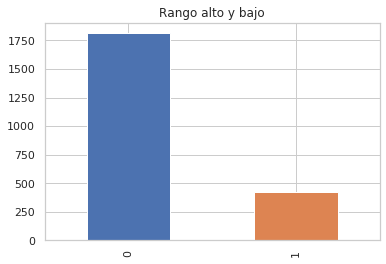

In [59]:
plot = listo['rango'].value_counts().plot(kind='bar',
                                            title='Rango alto y bajo')

In [60]:
listo.corr()

,salario,años de experiencia
salario,1.000000,0.427075
años de experiencia,0.427075,1.000000


In [61]:
listo.to_csv('listo.csv')

In [62]:
# listo.to_csv('listo.csv')
listo = pd.read_csv("listo.csv", sep = ',', encoding='latin-1')
# listo['fecha'] = final9
listo[[]] = listo[[]].astype(int)
# listo2 = listo.describe()
# C

In [63]:
listo[['Fecha_Publicacion']] = listo[['Fecha_Publicacion']].apply(pd.to_datetime, format="%d/%m/%Y")
C = listo.groupby('Fecha_Publicacion').sum()

In [64]:
from datetime import datetime, date, time, timedelta
import calendar
print("Día:", C.index.day)
print("Mes:", C.index.month)
print("Año:", C.index.year)
print("Día:", C.index.week)

Día: Int64Index([17, 21, 22, 28, 31,  6, 11, 15, 19, 20, 26, 30,  2,  4,  5,  6,  8,
             9, 10, 11, 12, 13, 14],
           dtype='int64', name='Fecha_Publicacion')
Mes: Int64Index([5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
            7],
           dtype='int64', name='Fecha_Publicacion')
Año: Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            2019],
           dtype='int64', name='Fecha_Publicacion')
Día: Int64Index([20, 21, 21, 22, 22, 23, 24, 24, 25, 25, 26, 26, 27, 27, 27, 27, 28,
            28, 28, 28, 28, 28, 28],
           dtype='int64', name='Fecha_Publicacion')


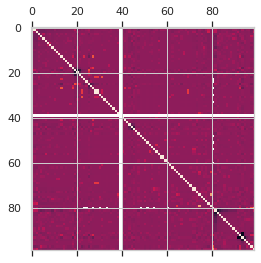

In [65]:
plt.matshow(listo.corr())

<h3> Análisis Descriptivo </h3>

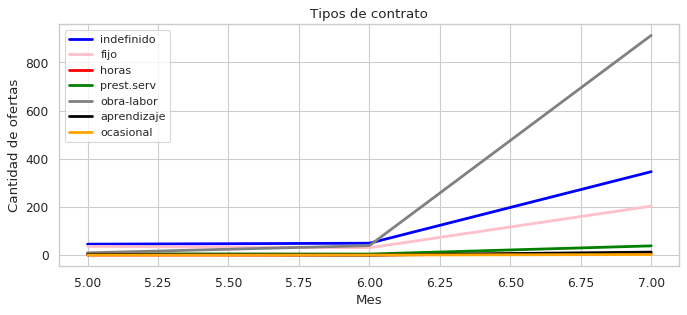

In [66]:
import pylab as pl
# listo1 = listo.describe()
# listo1
# TIPO DE CONTRATO
X = C.index.month.unique()
Y = C.groupby(C.index.month)['indefinido'].sum()
M = C.groupby(C.index.month)['fijo'].sum()
N = C.groupby(C.index.month)['horas'].sum()
O = C.groupby(C.index.month)['prestserv'].sum()
P = C.groupby(C.index.month)['obralabor'].sum()
Q = C.groupby(C.index.month)['aprendizaje'].sum()
R = C.groupby(C.index.month)['ocasional'].sum()
# listo.groupby('fecha').mean()
# listo['ingsistemas'].dtype
pl.figure(figsize=(10, 4), dpi=80)
pl.title(u'Tipos de contrato')
pl.xlabel('Mes')
pl.ylabel('Cantidad de ofertas')
pl.plot(X, Y, color="blue", linewidth=2.5, linestyle="-", label = 'indefinido')
pl.plot(X, M, color="pink", linewidth=2.5, linestyle="-", label = 'fijo')
pl.plot(X, N, color="red", linewidth=2.5, linestyle="-", label = 'horas')
pl.plot(X, O, color="green", linewidth=2.5, linestyle="-", label = 'prest.serv')
pl.plot(X, P, color="gray", linewidth=2.5, linestyle="-", label = 'obra-labor')
pl.plot(X, Q, color="black", linewidth=2.5, linestyle="-", label = 'aprendizaje')
pl.plot(X, R, color="orange", linewidth=2.5, linestyle="-", label = 'ocasional')
pl.legend(loc = 'upper left', fontsize = 10)

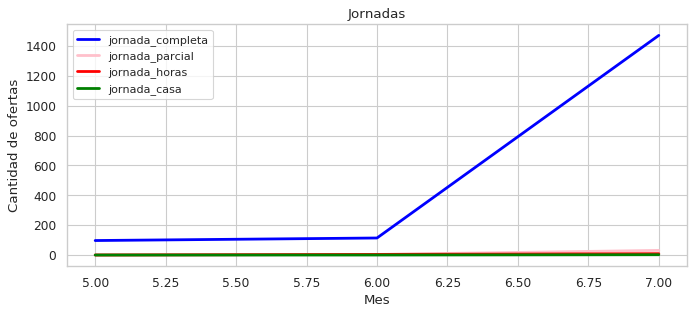

In [67]:
import pylab as pl
# listo1 = listo.describe()
# listo1
# JORNADAS
X = C.index.month.unique()
Y = C.groupby(C.index.month)['jornada_completa'].sum()
M = C.groupby(C.index.month)['jornada_parcial'].sum()
N = C.groupby(C.index.month)['jornada_horas'].sum()
O = C.groupby(C.index.month)['jornada_casa'].sum()
# listo.groupby('fecha').mean()
# listo['ingsistemas'].dtype
pl.figure(figsize=(10, 4), dpi=80)
pl.title(u'Jornadas')
pl.xlabel('Mes')
pl.ylabel('Cantidad de ofertas')
pl.plot(X, Y, color="blue", linewidth=2.5, linestyle="-", label = 'jornada_completa')
pl.plot(X, M, color="pink", linewidth=2.5, linestyle="-", label = 'jornada_parcial')
pl.plot(X, N, color="red", linewidth=2.5, linestyle="-", label = 'jornada_horas')
pl.plot(X, O, color="green", linewidth=2.5, linestyle="-", label = 'jornada_casa')
pl.legend(loc = 'upper left', fontsize = 10)

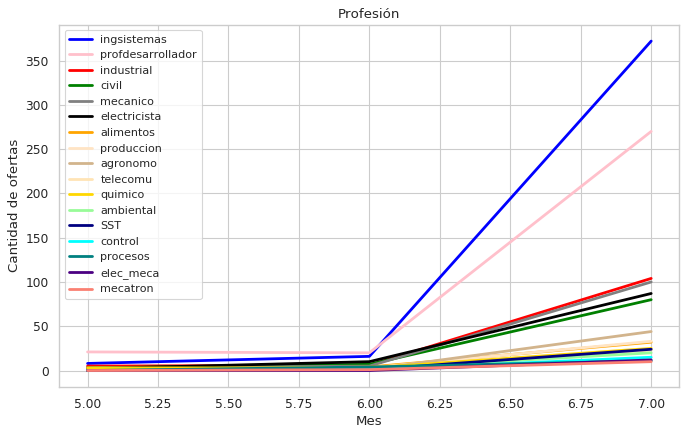

In [68]:
import pylab as pl
# listo1 = listo.describe()
# listo1
# PROFESION
X = C.index.month.unique()
Y = C.groupby(C.index.month)['ingsistemas'].sum()
M = C.groupby(C.index.month)['profdesarrollador'].sum()
N = C.groupby(C.index.month)['industrial'].sum()
O = C.groupby(C.index.month)['civil'].sum()
P = C.groupby(C.index.month)['mecanico'].sum()
Q = C.groupby(C.index.month)['electricista'].sum()
R = C.groupby(C.index.month)['alimentos'].sum()
S = C.groupby(C.index.month)['produccion'].sum()
T = C.groupby(C.index.month)['agronomo'].sum()
U = C.groupby(C.index.month)['telecomu'].sum()
V = C.groupby(C.index.month)['quimico'].sum()
W = C.groupby(C.index.month)['ambiental'].sum()
Z = C.groupby(C.index.month)['SST'].sum()
A = C.groupby(C.index.month)['control'].sum()
B = C.groupby(C.index.month)['procesos'].sum()
D = C.groupby(C.index.month)['elec_meca'].sum()
E = C.groupby(C.index.month)['mecatron'].sum()
# listo.groupby('fecha').mean()
# listo['ingsistemas'].dtype
pl.figure(figsize=(10, 6), dpi=80)
pl.title(u'Profesión')
pl.xlabel('Mes')
pl.ylabel('Cantidad de ofertas')
pl.plot(X, Y, color="blue", linewidth=2.5, linestyle="-", label = 'ingsistemas')
pl.plot(X, M, color="pink", linewidth=2.5, linestyle="-", label = 'profdesarrollador')
pl.plot(X, N, color="red", linewidth=2.5, linestyle="-", label = 'industrial')
pl.plot(X, O, color="green", linewidth=2.5, linestyle="-", label = 'civil')
pl.plot(X, P, color="gray", linewidth=2.5, linestyle="-", label = 'mecanico')
pl.plot(X, Q, color="black", linewidth=2.5, linestyle="-", label = 'electricista')
pl.plot(X, R, color="orange", linewidth=2.5, linestyle="-", label = 'alimentos')
pl.plot(X, S, color="bisque", linewidth=2.5, linestyle="-", label = 'produccion')
pl.plot(X, T, color="tan", linewidth=2.5, linestyle="-", label = 'agronomo')
pl.plot(X, U, color="moccasin", linewidth=2.5, linestyle="-", label = 'telecomu')
pl.plot(X, V, color="gold", linewidth=2.5, linestyle="-", label = 'quimico')
pl.plot(X, W, color="palegreen", linewidth=2.5, linestyle="-", label = 'ambiental')
pl.plot(X, Z, color="navy", linewidth=2.5, linestyle="-", label = 'SST')
pl.plot(X, A, color="aqua", linewidth=2.5, linestyle="-", label = 'control')
pl.plot(X, B, color="teal", linewidth=2.5, linestyle="-", label = 'procesos')
pl.plot(X, D, color="indigo", linewidth=2.5, linestyle="-", label = 'elec_meca')
pl.plot(X, E, color="salmon", linewidth=2.5, linestyle="-", label = 'mecatron')
pl.legend(loc = 'upper left', fontsize = 10)

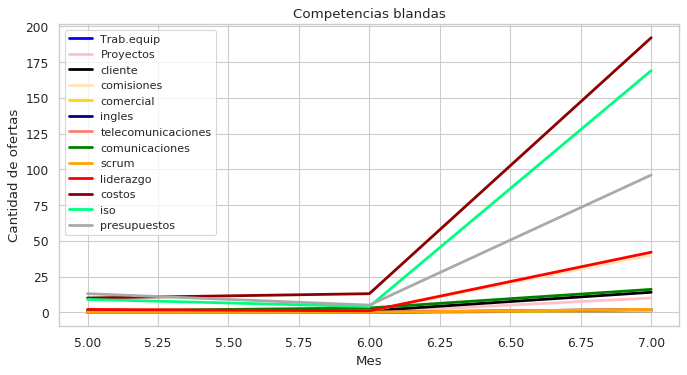

In [69]:
import pylab as pl
# listo1 = listo.describe()
# listo1
# OTRAS COMPETENCIAS
X = C.index.month.unique()
A = C.groupby(C.index.month)['Trab.equip'].sum()
B = C.groupby(C.index.month)['Proyectos'].sum()
G = C.groupby(C.index.month)['cliente'].sum()
K = C.groupby(C.index.month)['comisiones'].sum()
L = C.groupby(C.index.month)['comercial'].sum()
N = C.groupby(C.index.month)['ingles'].sum()
W = C.groupby(C.index.month)['telecomunicaciones'].sum()
Z = C.groupby(C.index.month)['comunicaciones'].sum()
A2 = C.groupby(C.index.month)['scrum'].sum()
A3 = C.groupby(C.index.month)['liderazgo'].sum()
A4 = C.groupby(C.index.month)['costos'].sum()
A5 = C.groupby(C.index.month)['iso'].sum()
A6 = C.groupby(C.index.month)['presupuestos'].sum()
# listo.groupby('fecha').mean()
# listo['ingsistemas'].dtype
pl.figure(figsize=(10, 5), dpi=80)
pl.title(u'Competencias blandas')
pl.xlabel('Mes')
pl.ylabel('Cantidad de ofertas')
pl.plot(X, A, color="blue", linewidth=2.5, linestyle="-", label = 'Trab.equip')
pl.plot(X, B, color="pink", linewidth=2.5, linestyle="-", label = 'Proyectos')
pl.plot(X, G, color="black", linewidth=2.5, linestyle="-", label = 'cliente')
pl.plot(X, K, color="moccasin", linewidth=2.5, linestyle="-", label = 'comisiones')
pl.plot(X, L, color="gold", linewidth=2.5, linestyle="-", label = 'comercial')
pl.plot(X, N, color="navy", linewidth=2.5, linestyle="-", label = 'ingles')
pl.plot(X, W, color="salmon", linewidth=2.5, linestyle="-", label = 'telecomunicaciones')
pl.plot(X, Z, color="green", linewidth=2.5, linestyle="-", label = 'comunicaciones')
pl.plot(X, A2, color="orange", linewidth=2.5, linestyle="-", label = 'scrum')
pl.plot(X, A3, color="red", linewidth=2.5, linestyle="-", label = 'liderazgo')
pl.plot(X, A4, color="darkred", linewidth=2.5, linestyle="-", label = 'costos')
pl.plot(X, A5, color="springgreen", linewidth=2.5, linestyle="-", label = 'iso')
pl.plot(X, A6, color="darkgrey", linewidth=2.5, linestyle="-", label = 'presupuestos')
pl.legend(loc = 'upper left', fontsize = 10)

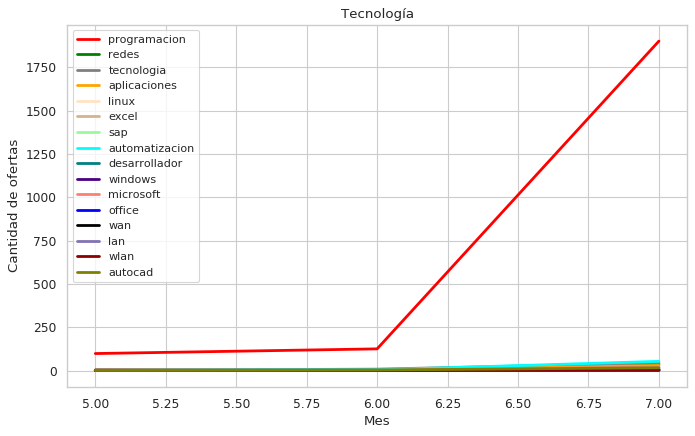

In [70]:
# TECNOLOGÍA
X = C.index.month.unique()
D = C.groupby(C.index.month)['programacion'].sum()
E = C.groupby(C.index.month)['redes'].sum()
F = C.groupby(C.index.month)['tecnologia'].sum()
H = C.groupby(C.index.month)['aplicaciones'].sum()
I = C.groupby(C.index.month)['linux'].sum()
J = C.groupby(C.index.month)['excel'].sum()
M = C.groupby(C.index.month)['sap'].sum()
O = C.groupby(C.index.month)['automatizacion'].sum()
P = C.groupby(C.index.month)['desarrollador'].sum()
Q = C.groupby(C.index.month)['windows'].sum()
R = C.groupby(C.index.month)['microsoft'].sum()
S = C.groupby(C.index.month)['office'].sum()
T = C.groupby(C.index.month)['wan'].sum()
U = C.groupby(C.index.month)['lan'].sum()
V = C.groupby(C.index.month)['wlan'].sum()
A1 = C.groupby(C.index.month)['autocad'].sum()
pl.figure(figsize=(10, 6), dpi=80)
pl.title(u'Tecnología')
pl.xlabel('Mes')
pl.ylabel('Cantidad de ofertas')
pl.plot(X, D, color="red", linewidth=2.5, linestyle="-", label = 'programacion')
pl.plot(X, E, color="green", linewidth=2.5, linestyle="-", label = 'redes')
pl.plot(X, F, color="gray", linewidth=2.5, linestyle="-", label = 'tecnologia')
pl.plot(X, H, color="orange", linewidth=2.5, linestyle="-", label = 'aplicaciones')
pl.plot(X, I, color="bisque", linewidth=2.5, linestyle="-", label = 'linux')
pl.plot(X, J, color="tan", linewidth=2.5, linestyle="-", label = 'excel')
pl.plot(X, M, color="palegreen", linewidth=2.5, linestyle="-", label = 'sap')
pl.plot(X, O, color="aqua", linewidth=2.5, linestyle="-", label = 'automatizacion')
pl.plot(X, P, color="teal", linewidth=2.5, linestyle="-", label = 'desarrollador')
pl.plot(X, Q, color="indigo", linewidth=2.5, linestyle="-", label = 'windows')
pl.plot(X, R, color="salmon", linewidth=2.5, linestyle="-", label = 'microsoft')
pl.plot(X, S, color="blue", linewidth=2.5, linestyle="-", label = 'office')
pl.plot(X, T, color="black", linewidth=2.5, linestyle="-", label = 'wan')
pl.plot(X, U, color="m", linewidth=2.5, linestyle="-", label = 'lan')
pl.plot(X, V, color="darkred", linewidth=2.5, linestyle="-", label = 'wlan')
pl.plot(X, A1, color="olive", linewidth=2.5, linestyle="-", label = 'autocad')
pl.legend(loc = 'upper left', fontsize = 10)

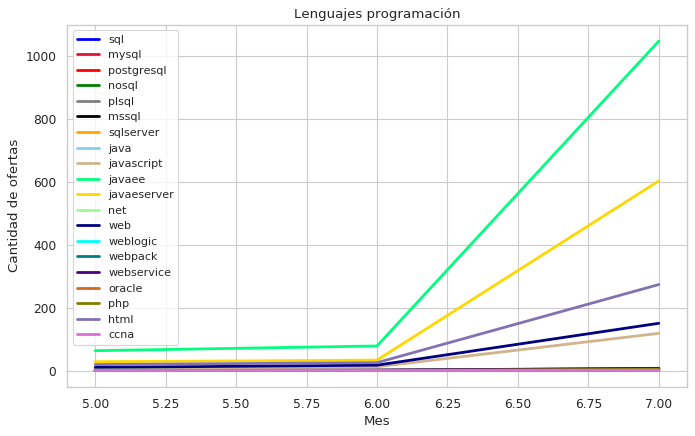

In [71]:
# PROGRAMACION
X = C.index.month.unique()
A = C.groupby(C.index.month)['sql'].sum()
B = C.groupby(C.index.month)['mysql'].sum()
D = C.groupby(C.index.month)['postgresql'].sum()
E = C.groupby(C.index.month)['nosql'].sum()
F = C.groupby(C.index.month)['plsql'].sum()
G = C.groupby(C.index.month)['mssql'].sum()
H = C.groupby(C.index.month)['sqlserver'].sum()
I = C.groupby(C.index.month)['java'].sum()
J = C.groupby(C.index.month)['javascript'].sum()
K = C.groupby(C.index.month)['javaee'].sum()
L = C.groupby(C.index.month)['javaeserver'].sum()
M = C.groupby(C.index.month)['net'].sum()
N = C.groupby(C.index.month)['web'].sum()
O = C.groupby(C.index.month)['weblogic'].sum()
P = C.groupby(C.index.month)['webpack'].sum()
Q = C.groupby(C.index.month)['webservice'].sum()
R = C.groupby(C.index.month)['webmaster'].sum()
S = C.groupby(C.index.month)['oracle'].sum()
T = C.groupby(C.index.month)['php'].sum()
U = C.groupby(C.index.month)['html'].sum()
V = C.groupby(C.index.month)['ccna'].sum()
pl.figure(figsize=(10, 6), dpi=80)
pl.title(u'Lenguajes programación')
pl.xlabel('Mes')
pl.ylabel('Cantidad de ofertas')
pl.plot(X, A, color="blue", linewidth=2.5, linestyle="-", label = 'sql')
pl.plot(X, B, color="crimson", linewidth=2.5, linestyle="-", label = 'mysql')
pl.plot(X, D, color="red", linewidth=2.5, linestyle="-", label = 'postgresql')
pl.plot(X, E, color="green", linewidth=2.5, linestyle="-", label = 'nosql')
pl.plot(X, F, color="gray", linewidth=2.5, linestyle="-", label = 'plsql')
pl.plot(X, G, color="black", linewidth=2.5, linestyle="-", label = 'mssql')
pl.plot(X, H, color="orange", linewidth=2.5, linestyle="-", label = 'sqlserver')
pl.plot(X, I, color="skyblue", linewidth=2.5, linestyle="-", label = 'java')
pl.plot(X, J, color="tan", linewidth=2.5, linestyle="-", label = 'javascript')
pl.plot(X, K, color="springgreen", linewidth=2.5, linestyle="-", label = 'javaee')
pl.plot(X, L, color="gold", linewidth=2.5, linestyle="-", label = 'javaeserver')
pl.plot(X, M, color="palegreen", linewidth=2.5, linestyle="-", label = 'net')
pl.plot(X, N, color="navy", linewidth=2.5, linestyle="-", label = 'web')
pl.plot(X, O, color="aqua", linewidth=2.5, linestyle="-", label = 'weblogic')
pl.plot(X, P, color="teal", linewidth=2.5, linestyle="-", label = 'webpack')
pl.plot(X, Q, color="indigo", linewidth=2.5, linestyle="-", label = 'webservice')
# pl.plot(X, R, color="salmon", linewidth=2.5, linestyle="-", label = 'webmaster')
pl.plot(X, S, color="chocolate", linewidth=2.5, linestyle="-", label = 'oracle')
pl.plot(X, T, color="olive", linewidth=2.5, linestyle="-", label = 'php')
pl.plot(X, U, color="m", linewidth=2.5, linestyle="-", label = 'html')
pl.plot(X, V, color="orchid", linewidth=2.5, linestyle="-", label = 'ccna')
pl.legend(loc = 'upper left', fontsize = 10)

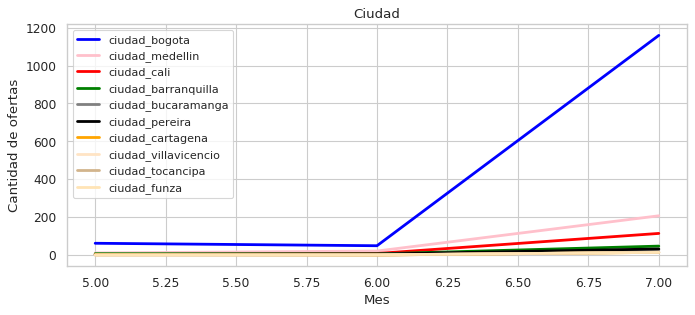

In [72]:
# CIUDADES
X = C.index.month.unique()
Y = C.groupby(C.index.month)['ciudad_bogota'].sum()
M = C.groupby(C.index.month)['ciudad_medellin'].sum()
N = C.groupby(C.index.month)['ciudad_cali'].sum()
O = C.groupby(C.index.month)['ciudad_barranquilla'].sum()
P = C.groupby(C.index.month)['ciudad_bucaramanga'].sum()
Q = C.groupby(C.index.month)['ciudad_pereira'].sum()
R = C.groupby(C.index.month)['ciudad_cartagena'].sum()
S = C.groupby(C.index.month)['ciudad_villavicencio'].sum()
T = C.groupby(C.index.month)['ciudad_tocancipa'].sum()
U = C.groupby(C.index.month)['ciudad_funza'].sum()

# listo.groupby('fecha').mean()
# listo['ingsistemas'].dtype
pl.figure(figsize=(10, 4), dpi=80)
pl.title(u'Ciudad')
pl.xlabel('Mes')
pl.ylabel('Cantidad de ofertas')
pl.plot(X, Y, color="blue", linewidth=2.5, linestyle="-", label = 'ciudad_bogota')
pl.plot(X, M, color="pink", linewidth=2.5, linestyle="-", label = 'ciudad_medellin')
pl.plot(X, N, color="red", linewidth=2.5, linestyle="-", label = 'ciudad_cali')
pl.plot(X, O, color="green", linewidth=2.5, linestyle="-", label = 'ciudad_barranquilla')
pl.plot(X, P, color="gray", linewidth=2.5, linestyle="-", label = 'ciudad_bucaramanga')
pl.plot(X, Q, color="black", linewidth=2.5, linestyle="-", label = 'ciudad_pereira')
pl.plot(X, R, color="orange", linewidth=2.5, linestyle="-", label = 'ciudad_cartagena')
pl.plot(X, S, color="bisque", linewidth=2.5, linestyle="-", label = 'ciudad_villavicencio')
pl.plot(X, T, color="tan", linewidth=2.5, linestyle="-", label = 'ciudad_tocancipa')
pl.plot(X, U, color="moccasin", linewidth=2.5, linestyle="-", label = 'ciudad_funza')
pl.legend(loc = 'upper left', fontsize = 10)

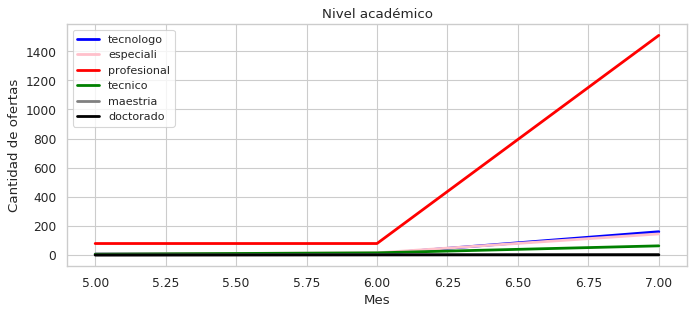

In [73]:
# NIVEL ACADEMICO
X = C.index.month.unique()
Y = C.groupby(C.index.month)['tecnologo'].sum()
M = C.groupby(C.index.month)['especiali'].sum()
N = C.groupby(C.index.month)['profesional'].sum()
O = C.groupby(C.index.month)['tecnico'].sum()
P = C.groupby(C.index.month)['maestria'].sum()
Q = C.groupby(C.index.month)['doctorado'].sum()
# listo.groupby('fecha').mean()
# listo['ingsistemas'].dtype
pl.figure(figsize=(10, 4), dpi=80)
pl.title(u'Nivel académico')
pl.xlabel('Mes')
pl.ylabel('Cantidad de ofertas')
pl.plot(X, Y, color="blue", linewidth=2.5, linestyle="-", label = 'tecnologo')
pl.plot(X, M, color="pink", linewidth=2.5, linestyle="-", label = 'especiali')
pl.plot(X, N, color="red", linewidth=2.5, linestyle="-", label = 'profesional')
pl.plot(X, O, color="green", linewidth=2.5, linestyle="-", label = 'tecnico')
pl.plot(X, P, color="gray", linewidth=2.5, linestyle="-", label = 'maestria')
pl.plot(X, Q, color="black", linewidth=2.5, linestyle="-", label = 'doctorado')
pl.legend(loc = 'upper left', fontsize = 10)

In [74]:
listo3 = listo.describe()
listo3[listo3.columns[1:99]]

,ingsistemas,profdesarrollador,industrial,civil,mecanico,electricista,alimentos,produccion,agronomo,telecomu,...,ciudad_tocancipa,ciudad_funza,tecnologo,especiali,profesional,tecnico,maestria,doctorado,aÃ±os de experiencia,rango
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,...,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2137.000000,2237.000000
mean,0.182387,0.143496,0.054090,0.043809,0.051408,0.045597,0.016093,0.016093,0.021904,0.011176,...,0.006705,0.006705,0.083147,0.078677,0.777380,0.042915,0.003576,0.000894,2.436125,0.189540
std,0.386250,0.350656,0.226246,0.204715,0.220878,0.208656,0.125861,0.125861,0.146404,0.105146,...,0.081630,0.081630,0.276166,0.269294,0.416098,0.202710,0.059708,0.029894,1.730635,0.392024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000


In [60]:
# listo['salario'].head()

0    3.0
1    1.8
2    3.0
3    NaN
4    3.0
Name: salario, dtype: float64

In [75]:
from sklearn.preprocessing import LabelEncoder
listo['aÃ±os de experiencia'] = listo['aÃ±os de experiencia'].astype(str) # OK
listo['Fecha_Publicacion'] = listo['Fecha_Publicacion'].astype(str)
listo['salario'] = listo['salario'].astype(str)
enc = LabelEncoder()
listo['aÃ±os de experiencia'] = enc.fit_transform(listo["aÃ±os de experiencia"])
listo['Fecha_Publicacion'] = enc.fit_transform(listo["Fecha_Publicacion"])
listo['salario'] = enc.fit_transform(listo["salario"])
nuevo = listo[listo.columns[0:98]]
# nuevo.shape

In [76]:
# from matplotlib.mlab import PCA
# import urllib2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# from sklearn.decomposition import PCA
# pca=PCA(n_components=9)
# results = pca.fit(nuevo)
# results

<h3> Análisis de Correlaciones </h3>

In [77]:
# listo.to_csv('listo.csv')
listo = pd.read_csv("listo.csv", sep = ',', encoding='latin-1')
# listo['fecha'] = final9
listo[[]] = listo[[]].astype(int)
# listo2 = listo.describe()
correlaciones = listo.corr()
correlaciones.head()

,Unnamed: 0,ingsistemas,profdesarrollador,industrial,civil,mecanico,electricista,alimentos,produccion,agronomo,...,ciudad_tocancipa,ciudad_funza,tecnologo,especiali,profesional,tecnico,maestria,doctorado,aÃ±os de experiencia,rango
Unnamed: 0,1.000000,0.000065,0.006883,0.001919,0.028154,-0.027473,-0.023288,0.015129,-0.021703,-0.030339,...,0.008287,0.065890,0.011287,0.011578,-0.009966,-0.003115,0.016757,0.001714,-0.010458,-0.010371
ingsistemas,0.000065,1.000000,0.024612,-0.097589,-0.101095,-0.109951,-0.069939,-0.060404,-0.060404,-0.070680,...,0.032116,0.032116,-0.024837,-0.056326,0.071873,-0.042892,0.010489,0.024604,-0.092855,0.061044
profdesarrollador,0.006883,0.024612,1.000000,-0.092242,-0.087612,-0.095286,-0.083353,-0.052348,-0.052348,-0.052542,...,-0.033630,-0.018006,0.098414,-0.048570,-0.004718,-0.023755,-0.024521,-0.012244,-0.073168,0.182702
industrial,0.001919,-0.097589,-0.092242,1.000000,-0.031873,0.141218,-0.042794,0.000828,0.047945,-0.035786,...,0.125647,0.004568,-0.029066,0.040226,0.004451,-0.011630,-0.014326,-0.007153,-0.035007,-0.060177
civil,0.028154,-0.101095,-0.087612,-0.031873,1.000000,-0.030048,-0.046785,-0.027375,-0.010017,-0.032032,...,-0.017587,0.009176,-0.064459,0.034800,0.041040,-0.034548,-0.012823,-0.006403,0.176889,-0.025494


<p> <b> Hallazgos: </b> <br/>
    - Comercial: oracle (1) <br/>
    - Metodología Scrum: ccna (0.71) <br/>
    - Salario: años de experiencia (0.43), especialización, maestría, desarrollador <br/>
    - Inglés: proyectos, aplicaciones  <br/>
    - Excel: cliente, redes <br/>
    - Javascript: jornada por horas <br/>
    - Trabajo en equipo: liderazgo <br/>
</p>

In [220]:
# correlaciones['html'].sort_values(ascending = False)

html                    1.000000
tecnologia              0.121176
iso                     0.092974
liderazgo               0.084154
webservice              0.080664
sap                     0.071911
ciudad_medellin         0.061707
php                     0.060391
aplicaciones            0.059288
ambiental               0.057571
costos                  0.056956
industrial              0.056566
especiali               0.056357
quimico                 0.051357
java                    0.050837
ccna                    0.050837
automatizacion          0.047976
salario                 0.046088
aÃ±os de experiencia    0.045463
desarrollador           0.044404
procesos                0.043051
fijo                    0.042167
autocad                 0.035188
comunicaciones          0.035188
javaeserver             0.032264
scrum                   0.029733
web                     0.029212
profesional             0.025649
comisiones              0.024391
sqlserver               0.021834
          

<h3> Análisis de Componentes Principales </h3>

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#from imblearn.over_sampling import SMOTE

In [79]:
df = pd.read_csv("listo.csv", sep = ',', encoding='latin-1')

In [80]:
from sklearn.preprocessing import LabelEncoder
df['aÃ±os de experiencia'] = df['aÃ±os de experiencia'].astype(str)
enc = LabelEncoder()
df['aÃ±os de experiencia'] = enc.fit_transform(df["aÃ±os de experiencia"])

In [81]:
from sklearn.preprocessing import StandardScaler
x1 = df[df.columns[1:80]]
x2= df[df.columns[82:98]]
y = df.salario

<p> <b> Variables: </b> <br/>
    - Independientes: Variables excepto salario y fecha de publicación de la oferta <br/>
    - Respuesta: Salario <br/>
</p>

In [82]:
x = pd.concat([x1, x2], axis = 1)
x.head()

,ingsistemas,profdesarrollador,industrial,civil,mecanico,electricista,alimentos,produccion,agronomo,telecomu,...,ciudad_villavicencio,ciudad_tocancipa,ciudad_funza,tecnologo,especiali,profesional,tecnico,maestria,doctorado,aÃ±os de experiencia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,7
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,7
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,7
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,9


In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['componente1', 'componente2', 'componente 3', 'componente 4', 'componente 5'])
principalDf.head()

,componente1,componente2,componente 3,componente 4,componente 5
0,0.287952,-0.481712,0.495454,0.088058,-0.033208
1,0.287153,-0.973411,-0.058879,-0.054844,-0.272678
2,0.294377,0.356710,-0.742936,-0.412766,-0.699930
3,-5.700819,0.086710,-0.688857,-0.347760,0.082934
4,2.285402,-0.393789,1.186512,-0.109556,-0.107622


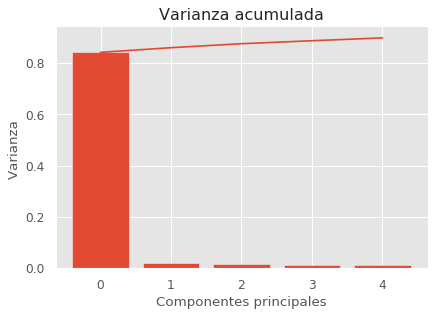

In [84]:
varianza = pca.explained_variance_ratio_
var_acum= np.cumsum(varianza)
plt.figure(figsize=(6, 4), dpi=80)
plt.title(u'Varianza acumulada')
plt.xlabel('Componentes principales')
plt.ylabel('Varianza ')
plt.bar(range(len(varianza)), varianza)
plt.plot(range(len(varianza)), var_acum)
plt.show()

In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['componente1', 'componente2'])
principalDf.head()

,componente1,componente2
0,0.287952,-0.481708
1,0.287153,-0.973406
2,0.294377,0.356712
3,-5.700819,0.086710
4,2.285402,-0.393787


In [86]:
finalDf = pd.concat([principalDf, df[['salario']]], axis = 1)
finalDf.head()

,componente1,componente2,salario
0,0.287952,-0.481708,3.0
1,0.287153,-0.973406,1.8
2,0.294377,0.356712,3.0
3,-5.700819,0.086710,NaN
4,2.285402,-0.393787,3.0


In [87]:
from sklearn.preprocessing import StandardScaler
cov_mat = np.cov(x.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# print('Eigenvectors \n%s' %eig_vecs)
vecfinal = pd.DataFrame(eig_vecs)
vector=vecfinal[vecfinal.columns[0:2]]
columns = pd.DataFrame(list(x.columns),columns=['variable'])
componentes = pd.concat([columns, vector], axis = 1)
componentes.head()
componentes = pd.DataFrame(componentes)
componentes[0]= componentes[0].abs()
componentes[1]= componentes[1].abs()
componentes.sort_values([0], ascending=[False]).head()

,variable,0,1
94,aÃ±os de experiencia,0.999819,0.006093
89,especiali,0.009223,0.056872
18,obralabor,0.006891,0.728982
75,costos,0.005741,0.034987
90,profesional,0.005572,0.185913


<p> <b> Hallazgos: </b> <br/>
    - Comp.1: años de experiencia, especialización <br/>
    - Comp.2: contrato por obra-labor, javaee (0.71) <br/>
</p>

<p style="color:red;"> <b> Punto de oportunidad 3: </b>  <br/> </p>
<p> - Recalcular el modelo con los rangos de años de experiencia normalizados <br/>
</p>

<h3> Regresión Logística todos los valores de salario </h3>

In [89]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn import preprocessing
import sklearn.model_selection
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns         #para graficos
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [90]:
data = pd.read_csv(r"listo.csv", sep = ',', encoding='latin-1')  # lectura del archivo de entrenamiento
data1 = data[data.columns[1:99]]
#print(data1.shape)
#print(list(data1.columns))

data=data1
print(data.shape)
print(list(data.columns))

#algunas estadisticas descriptivas que ayuden a tener una visión inicial de los datos por ejemplo el promedio:
#data.groupby('salario').mean()

#Se vuelve la variable salario a discreta
def rango(c):
    if c['salario']>=3:
        return '1'
    else:
        return '0'
    
data['salario']=data.apply(rango,axis=1)
#print(data['sal_rango'])
#print(data['salario'])

(2237, 98)
['ingsistemas', 'profdesarrollador', 'industrial', 'civil', 'mecanico', 'electricista', 'alimentos', 'produccion', 'agronomo', 'telecomu', 'quimico', 'ambiental', 'SST', 'control', 'procesos', 'elec_meca', 'mecatron', 'prestserv', 'obralabor', 'indefinido', 'fijo', 'aprendizaje', 'horas', 'ocasional', 'jornada_completa', 'jornada_parcial', 'jornada_horas', 'jornada_practicas', 'jornada_casa', 'Trab.equip', 'Proyectos', 'sql', 'mysql', 'postgresql', 'nosql', 'plsql', 'mssql', 'sqlserver', 'programacion', 'redes', 'tecnologia', 'java', 'javascript', 'javaee', 'javaeserver', 'net', 'web', 'weblogic', 'webpack', 'webservice', 'webmaster', 'cliente', 'aplicaciones', 'linux', 'excel', 'comisiones', 'oracle', 'comercial', 'php', 'sap', 'ingles', 'automatizacion', 'desarrollador', 'windows', 'microsoft', 'office', 'wan', 'lan', 'wlan', 'telecomunicaciones', 'comunicaciones', 'autocad', 'html', 'scrum', 'liderazgo', 'costos', 'iso', 'presupuestos', 'ccna', 'salario', 'ciudad_bogota',

salario
0    1658
1     579
dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

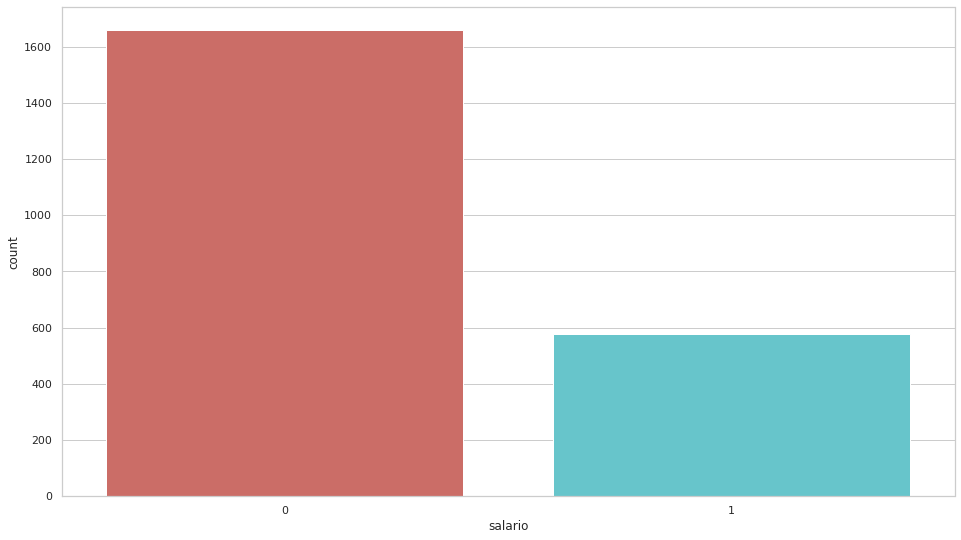

In [91]:
#Se muestra la cantidad de datos para cada opción de la variable respuesta: y_auto_cura
print(data.groupby('salario').size())
sns.countplot(x='salario',data=data, palette='hls')
plt.show

In [92]:
#se transforma las variables que están en tipo string a variables dummy para que las pueda aceptar el modelo de regresión  logística 
data['salario'] = data['salario'].astype(str)
data['aÃ±os de experiencia'] = data['aÃ±os de experiencia'].astype(str) # OK
data['Fecha_Publicacion'] = data['Fecha_Publicacion'].astype(str)

enc = LabelEncoder()
data["salario"] = enc.fit_transform(data["salario"])
data['aÃ±os de experiencia'] = enc.fit_transform(data["aÃ±os de experiencia"])
data['Fecha_Publicacion'] = enc.fit_transform(data["Fecha_Publicacion"])

#data.info()
#print(data["salario"])
#print(data["aÃ±os de experiencia"])
#print(data["Fecha_Publicacion"])

Longitud:  3008
conteo cero: 1504
conteo uno: 1504


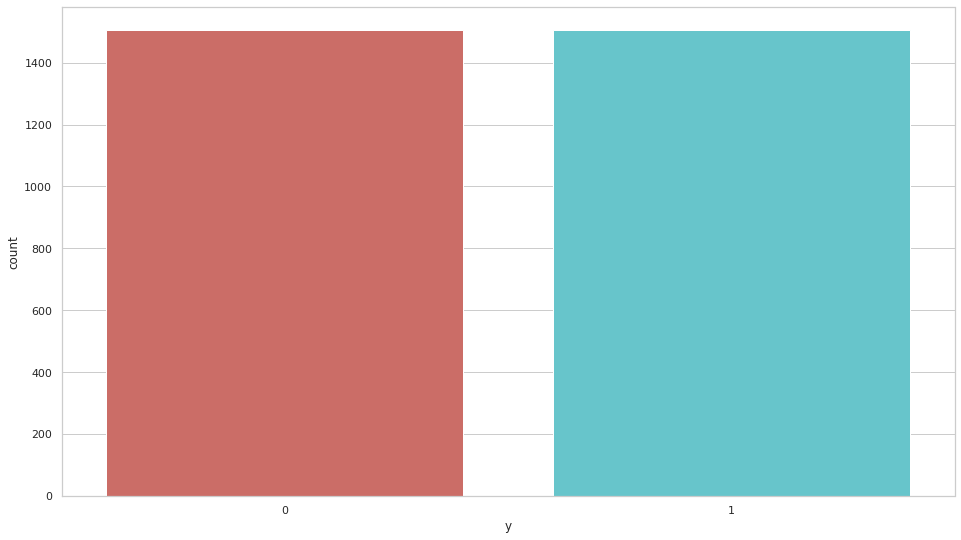

In [93]:
#Balanceo del conjunto de datos para que se entrene con igual probabilidad de predecir 0 ó 1
import warnings
warnings.filterwarnings('ignore')

x= data.loc[:, data.columns != 'salario'] # se deja en X las variables predictoras en el conjunto de datos
y= data.loc[:, data.columns == 'salario'] # se deja en Y la variable respuesta en el conjunto de datos
#print(y)
from imblearn.over_sampling import SMOTE # libreria para balancear el conjunto de datos
os = SMOTE(random_state=0) # se obtienen datos de manera aleatoria
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0) #se divide el dataset
columns=X_train.columns
#print(columns)
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
#print(os_data_X)
os_data_y = pd.DataFrame(data=os_data_y,columns=['y'])
print('Longitud: ',len(os_data_X))
print('conteo cero:',len(os_data_y[os_data_y['y']==0]))
print('conteo uno:',len(os_data_y[os_data_y['y']==1]))
#sns.countplot(x='y',data=os_data_y,palette='hls')
sns.countplot(x='y',data=os_data_y,palette='hls')
plt.show()
#print(data['Fecha_Publicacion'])

In [94]:
#Análisis de variables relevantes para el modelo
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_) 
print(rfe.ranking_)

[False False  True False  True  True  True  True False False  True  True
  True False  True False  True  True False False False  True False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False  True False False
  True False  True False  True  True False False  True False False False
 False]
[52 38  1 25  1  1  1  1 17 16  1  1  1 46  1 34  1  1  5  3  2  1  8 24
  4 47 26 63 66 76 19 20 40 22 57 39  9 28 71 30  1 41 48 49 58 50 61 64
 12 32 54  7 45 60 42 77 36 44 43 31 69 23 37 35 73 33 53 55  6 59 29 14
 56 65  1 75 74 51 68 62 21  1 15 13  1 27  1 18  1  1 70 11  1 10 67 72
 78]


In [95]:
#se muestra el nombre de todas las variables y su clasificación si es relevante o no para el modelo
valid_cols = rfe.support_
valid_cols = list(valid_cols)
cols = list(columns)
print('Valor todas las variables: ','\n\n',cols,valid_cols)

#se muestra el nombre de las variables relevantes y se cuenta las variables relevantes y no relevantes para el modelo
terminar=len(cols)
cuentaT = 0
print('')
print('Variables relevantes: ', '\n')
for i in range(0, terminar):
    if rfe.ranking_[i] == 1:
        print(cols[i])
        cuentaT = cuentaT + 1
print('')
print('Total variables relevantes :',cuentaT)
print('Total variables no relevantes :',terminar-cuentaT)

Valor todas las variables:  

 ['ingsistemas', 'profdesarrollador', 'industrial', 'civil', 'mecanico', 'electricista', 'alimentos', 'produccion', 'agronomo', 'telecomu', 'quimico', 'ambiental', 'SST', 'control', 'procesos', 'elec_meca', 'mecatron', 'prestserv', 'obralabor', 'indefinido', 'fijo', 'aprendizaje', 'horas', 'ocasional', 'jornada_completa', 'jornada_parcial', 'jornada_horas', 'jornada_practicas', 'jornada_casa', 'Trab.equip', 'Proyectos', 'sql', 'mysql', 'postgresql', 'nosql', 'plsql', 'mssql', 'sqlserver', 'programacion', 'redes', 'tecnologia', 'java', 'javascript', 'javaee', 'javaeserver', 'net', 'web', 'weblogic', 'webpack', 'webservice', 'webmaster', 'cliente', 'aplicaciones', 'linux', 'excel', 'comisiones', 'oracle', 'comercial', 'php', 'sap', 'ingles', 'automatizacion', 'desarrollador', 'windows', 'microsoft', 'office', 'wan', 'lan', 'wlan', 'telecomunicaciones', 'comunicaciones', 'autocad', 'html', 'scrum', 'liderazgo', 'costos', 'iso', 'presupuestos', 'ccna', 'ciudad

In [97]:
from itertools import compress #se va a dejar solo las columnas relevantes al modelo
real_cols = list(compress(cols, valid_cols))
real_cols#lista de columnas relevantes
#print(len(real_cols))
#print(real_cols[19])
X=os_data_X[real_cols] #se deja el X
y=os_data_y['y']

In [98]:
#se separa el conjunto de datos en 90% para entrenamiento y 10% para tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [99]:
#se aplica la regresión logística al conjunto con el 90% de los datos
from sklearn import metrics
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
#se predice para la variable y del 10% de los datos
#y_pred = logreg.predict(X_test)
y_pred=logreg.predict_proba(X_test)
#X_test.describe

In [101]:
#se muestra los valores de la predicción para la variable y del 10% (test)
terminar=len(y_pred)
print("probabilidad salario alto:")
print("")

contaltos=0

for i in range(0, terminar):
    print(y_pred[i][1])
    if (y_pred[i][1]>=0.5):
        contaltos=contaltos+1

#print(terminar)
print("")
print("Numéro de ofertas con salario alto: ",contaltos)
print("Numéro de ofertas con salario bajo:", terminar-contaltos)

probabilidad salario alto:

0.624931917338716
0.624931917338716
0.2310937968382476
0.624931917338716
0.624931917338716
0.624931917338716
0.624931917338716
0.624931917338716
0.624931917338716
0.624931917338716
0.624931917338716
0.624931917338716
0.03063204592327829
0.624931917338716
0.624931917338716
0.624931917338716
0.012008424932656867
0.04285506193790841
0.21219069057095022
0.27679450117347354
0.624931917338716
0.624931917338716
0.2466041021859497
0.624931917338716
0.624931917338716
0.624931917338716
0.624931917338716
0.624931917338716
0.624931917338716
0.624931917338716
0.21219069057095022
0.624931917338716
0.624931917338716
0.624931917338716
0.624931917338716
0.624931917338716
0.06195157300037765
0.624931917338716
0.624931917338716
0.2488220073839605
0.04764945207984327
0.624931917338716
0.21219069057095022
0.624931917338716
0.21219069057095022
0.624931917338716
0.624931917338716
0.624931917338716
0.624931917338716
0.2310937968382476
0.624931917338716
0.624931917338716
0.624931917

In [102]:
print('precision modelo: {:.2f}'.format(logreg.score(X_test,y_test)))

precision modelo: 0.68


<h3> Regresión Logística (Salarios Nulos Producción) </h3>

In [103]:
data = pd.read_csv(r"listo.csv", sep = ',', encoding='latin-1')  # lectura del archivo de entrenamiento
data1 = data[data.columns[1:99]]
data=data1
data.describe
print(data.shape)
print(list(data.columns))

#algunas estadisticas descriptivas que ayuden a tener una visión inicial de los datos por ejemplo el promedio:
#data.groupby('salario').mean()

# para la variable salario se parte en dos el archivo los registros no nulos para el entrenamiento y los nulos para producción 
SalarioNoNull = pd.DataFrame(data[data.salario.notnull()]) # Entrenamiento y prueba
SalarioNull = pd.DataFrame(data[data.salario.isnull()])    # Producción

data=SalarioNoNull #cambio de variable: data ahora es solo los registros no nulos en el campo salario
#print(len(data))
#data.describe
#print(data.info())

#Se vuelve la variable salario a discreta
def rango(c):
    if c['salario']>=3:
        return '1'
    else:
        return '0'
    
data['salario']=data.apply(rango,axis=1)

(2237, 98)
['ingsistemas', 'profdesarrollador', 'industrial', 'civil', 'mecanico', 'electricista', 'alimentos', 'produccion', 'agronomo', 'telecomu', 'quimico', 'ambiental', 'SST', 'control', 'procesos', 'elec_meca', 'mecatron', 'prestserv', 'obralabor', 'indefinido', 'fijo', 'aprendizaje', 'horas', 'ocasional', 'jornada_completa', 'jornada_parcial', 'jornada_horas', 'jornada_practicas', 'jornada_casa', 'Trab.equip', 'Proyectos', 'sql', 'mysql', 'postgresql', 'nosql', 'plsql', 'mssql', 'sqlserver', 'programacion', 'redes', 'tecnologia', 'java', 'javascript', 'javaee', 'javaeserver', 'net', 'web', 'weblogic', 'webpack', 'webservice', 'webmaster', 'cliente', 'aplicaciones', 'linux', 'excel', 'comisiones', 'oracle', 'comercial', 'php', 'sap', 'ingles', 'automatizacion', 'desarrollador', 'windows', 'microsoft', 'office', 'wan', 'lan', 'wlan', 'telecomunicaciones', 'comunicaciones', 'autocad', 'html', 'scrum', 'liderazgo', 'costos', 'iso', 'presupuestos', 'ccna', 'salario', 'ciudad_bogota',

salario
0    931
1    579
dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

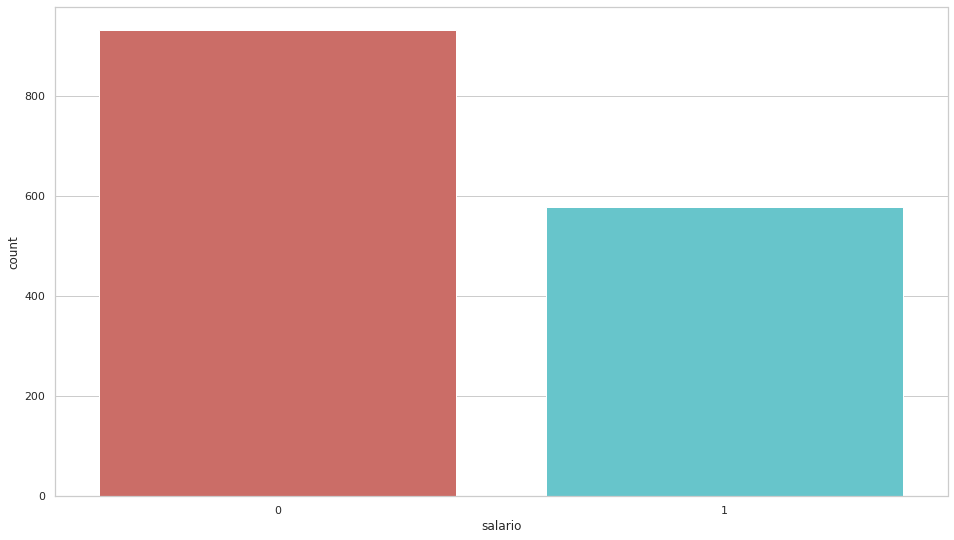

In [104]:
#Se muestra la cantidad de datos para cada opción de la variable respuesta: y_auto_cura
print(data.groupby('salario').size())
sns.countplot(x='salario',data=data, palette='hls')
plt.show

In [105]:
#se transforma las variables que están en tipo string a variables dummy para que las pueda aceptar el modelo de regresión  logística 
data['salario'] = data['salario'].astype(str)
data['aÃ±os de experiencia'] = data['aÃ±os de experiencia'].astype(str) # OK
data['Fecha_Publicacion'] = data['Fecha_Publicacion'].astype(str)

enc = LabelEncoder()
data["salario"] = enc.fit_transform(data["salario"])
data['aÃ±os de experiencia'] = enc.fit_transform(data["aÃ±os de experiencia"])
data['Fecha_Publicacion'] = enc.fit_transform(data["Fecha_Publicacion"])

#data.info()
#print(data["salario"])
#print(data["aÃ±os de experiencia"])
#print(data["Fecha_Publicacion"])

Longitud:  1672
conteo cero: 836
conteo uno: 836


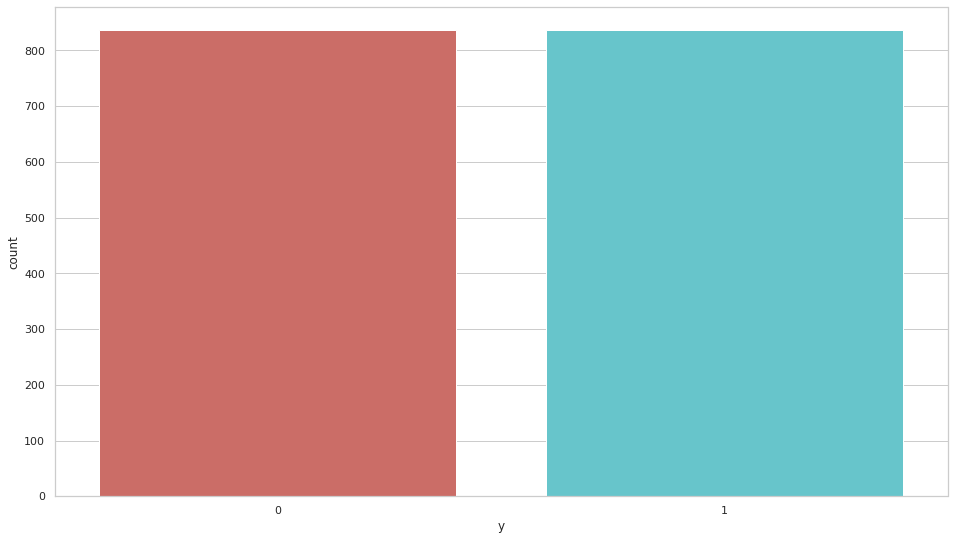

In [106]:
#Balanceo del conjunto de datos para que se entrene con igual probabilidad de predecir 0 ó 1
import warnings
warnings.filterwarnings('ignore')

x= data.loc[:, data.columns != 'salario'] # se deja en X las variables predictoras en el conjunto de datos
y= data.loc[:, data.columns == 'salario'] # se deja en Y la variable respuesta en el conjunto de datos
#print(y)
from imblearn.over_sampling import SMOTE # libreria para balancear el conjunto de datos
os = SMOTE(random_state=0) # se obtienen datos de manera aleatoria
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0) #se divide el dataset
columns=X_train.columns
#print(columns)
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
#print(os_data_X)
os_data_y = pd.DataFrame(data=os_data_y,columns=['y'])
print('Longitud: ',len(os_data_X))
print('conteo cero:',len(os_data_y[os_data_y['y']==0]))
print('conteo uno:',len(os_data_y[os_data_y['y']==1]))
#sns.countplot(x='y',data=os_data_y,palette='hls')
sns.countplot(x='y',data=os_data_y,palette='hls')
plt.show()
#print(data['Fecha_Publicacion'])

In [107]:
#Análisis de variables relevantes para el modelo
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_) 
print(rfe.ranking_)

[False False  True False False  True  True  True False False  True  True
  True False  True False  True False False False False  True False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False  True False
 False False  True False False False False False False  True False False
  True False  True False False  True False  True  True False False False
 False]
[68 13  1 36 19  1  1  1 29  4  1  1  1 26  1 61  1  7  9  8  6  1 69 70
 10 33 71 54 56 72 28 37 73 20 53 31  2 25 63 22  1 34 43 66 41 40 50 77
 30  1 74  3 16 75 11 51 39 35 27 76 23 62 48 45 64 17 32 78 38 58  1 14
 65 59  1 49 57 44 55 42 24  1 12 15  1 60  1  5 21  1 18  1  1 46 47 52
 67]


In [108]:
#se muestra el nombre de todas las variables y su clasificación si es relevante o no para el modelo
valid_cols = rfe.support_
valid_cols = list(valid_cols)
cols = list(columns)
print('Valor todas las variables: ','\n\n',cols,valid_cols)

#se muestra el nombre de las variables relevantes y se cuenta las variables relevantes y no relevantes para el modelo
terminar=len(cols)
cuentaT = 0
print('')
print('Variables relevantes: ', '\n')
for i in range(0, terminar):
    if rfe.ranking_[i] == 1:
        print(cols[i])
        cuentaT = cuentaT + 1
print('')
print('Total variables relevantes :',cuentaT)
print('Total variables no relevantes :',terminar-cuentaT)

Valor todas las variables:  

 ['ingsistemas', 'profdesarrollador', 'industrial', 'civil', 'mecanico', 'electricista', 'alimentos', 'produccion', 'agronomo', 'telecomu', 'quimico', 'ambiental', 'SST', 'control', 'procesos', 'elec_meca', 'mecatron', 'prestserv', 'obralabor', 'indefinido', 'fijo', 'aprendizaje', 'horas', 'ocasional', 'jornada_completa', 'jornada_parcial', 'jornada_horas', 'jornada_practicas', 'jornada_casa', 'Trab.equip', 'Proyectos', 'sql', 'mysql', 'postgresql', 'nosql', 'plsql', 'mssql', 'sqlserver', 'programacion', 'redes', 'tecnologia', 'java', 'javascript', 'javaee', 'javaeserver', 'net', 'web', 'weblogic', 'webpack', 'webservice', 'webmaster', 'cliente', 'aplicaciones', 'linux', 'excel', 'comisiones', 'oracle', 'comercial', 'php', 'sap', 'ingles', 'automatizacion', 'desarrollador', 'windows', 'microsoft', 'office', 'wan', 'lan', 'wlan', 'telecomunicaciones', 'comunicaciones', 'autocad', 'html', 'scrum', 'liderazgo', 'costos', 'iso', 'presupuestos', 'ccna', 'ciudad

In [109]:
from itertools import compress #se va a dejar solo las columnas relevantes al modelo
real_cols = list(compress(cols, valid_cols))
real_cols#lista de columnas relevantes
#print(len(real_cols))
#print(real_cols[19])
X=os_data_X[real_cols] #se deja el X
y=os_data_y['y']

In [110]:
#se separa el conjunto de datos en 90% para entrenamiento y 10% para tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [111]:
#se aplica la regresión logística al conjunto con el 90% de los datos
from sklearn import metrics
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
#se predice para la variable y del 10% de los datos
#y_pred = logreg.predict(X_test)
y_pred=logreg.predict_proba(X_test)
#X_test.describe

In [113]:
#se muestra los valores de la predicción para la variable y del 10% (test)
terminar=len(y_pred)
print("probabilidad salario alto:")
print("")

contaltos=0
for i in range(0, terminar):
    print(y_pred[i][1])
    if (y_pred[i][1]>=0.5):
        contaltos=contaltos+1

print("")
print("Numéro de ofertas con salario alto: ",contaltos)
print("Numéro de ofertas con salario bajo:", terminar-contaltos)

probabilidad salario alto:

0.5639855811969852
0.5639855811969852
0.18689225920474142
0.5639855811969852
0.5639855811969852
0.31192235212859076
0.13940192442867594
0.5639855811969852
0.5639855811969852
0.2379279507840288
0.5639855811969852
0.12430048538217955
0.5639855811969852
0.5639855811969852
0.5767122427835052
0.5639855811969852
0.5639855811969852
0.5639855811969852
0.5639855811969852
0.5639855811969852
0.5639855811969852
0.5639855811969852
0.3160973165106497
0.5639855811969852
0.5639855811969852
0.5639855811969852
0.09518457445415207
0.5639855811969852
0.5639855811969852
0.8139818763369152
0.058870477214760485
0.5639855811969852
0.5639855811969852
0.5639855811969852
0.5639855811969852
0.5639855811969852
0.5639855811969852
0.5639855811969852
0.5639855811969852
0.28716233586290557
0.5639855811969852
0.5639855811969852
0.5639855811969852
0.5639855811969852
0.19011838339255327
0.5639855811969852
0.8139818763369152
0.5639855811969852
0.5639855811969852
0.8139818763369152
0.24169215966

In [114]:
print('precision modelo: {:.2f}'.format(logreg.score(X_test,y_test)))

precision modelo: 0.71


################################
PARA PRODUCCIÓN:################################

In [115]:
#se hace la predicción para la variable respuesta con el conjunto de datos que en el campo salario tienen nulos: Dataframe:SalarioNull
data1 = SalarioNull
#len(data1)

In [ ]:
#información de los tamaños de filas y columnas y nombres de los campos del Dataframe: SalarioNull o sea data1  
#data1.describe
#print(data1.shape)
#print(list(data1.columns))
#print(data1.salario)

probabilidad salario alto para: 727 Ofertas de empleo

0.5639855811969852
0.024747569667156483
0.5639855811969852
0.5767122427835052
0.5639855811969852
0.5639855811969852
0.28711251702239
0.5733514776406281
0.09518457445415202
0.5639855811969852
0.3160973165106497
0.2416921596633456
0.5639855811969852
0.5639855811969852
0.28711251702239
0.5639855811969852
0.5639855811969852
0.5639855811969852
0.5639855811969852
0.5639855811969852
0.5639855811969852
0.5639855811969852
0.5639855811969852
0.1474440650883147
0.2379279507840288
0.5639855811969852
0.5639855811969852
0.5639855811969852
0.3160973165106497
0.8139818763369152
0.5639855811969852
0.5639855811969852
0.2379279507840288
0.5639855811969852
0.010181044333427173
0.28716233586290557
0.5639855811969852
0.05052586624431654
0.5639855811969852
0.5639855811969852
0.5639855811969852
0.34465491571233026
0.5639855811969852
0.1237154379805493
0.3085291723366014
0.8139818763369152
0.5639855811969852
0.5639855811969852
0.8139818763369152
0.56398558

<function matplotlib.pyplot.show(*args, **kw)>

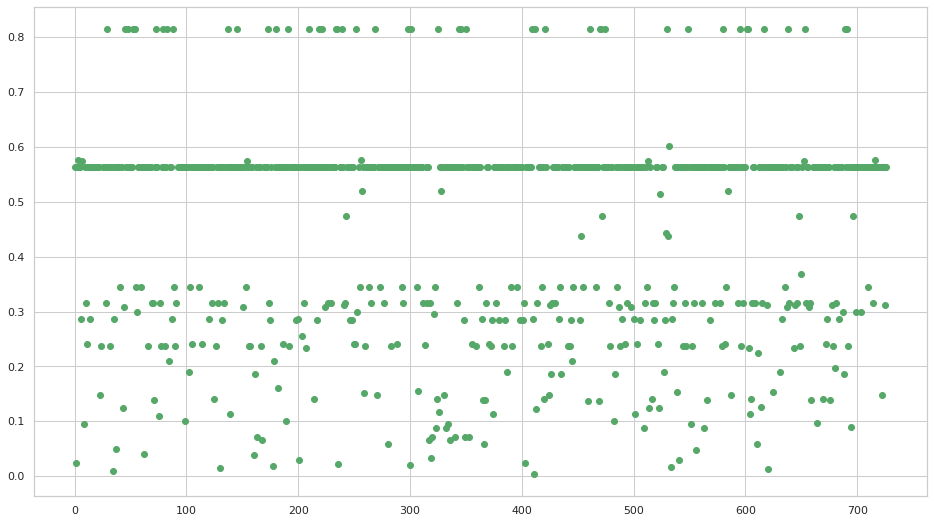

In [116]:
#se predice para la variable y del conjunto de producción, utilizando el entrenamiento ya realizado
data1['salario'] = data1['salario'].astype(str)
data1['aÃ±os de experiencia'] = data1['aÃ±os de experiencia'].astype(str) # OK
data1['Fecha_Publicacion'] = data1['Fecha_Publicacion'].astype(str)

enc = LabelEncoder()
data1["salario"] = enc.fit_transform(data1["salario"])
data1['aÃ±os de experiencia'] = enc.fit_transform(data1["aÃ±os de experiencia"])
data1['Fecha_Publicacion'] = enc.fit_transform(data1["Fecha_Publicacion"])

Xpro = pd.DataFrame(data1[real_cols])
#Xpro.describe

#se predice para la variable y del conjunto de producción de los datos
y_pred3 = pd.DataFrame(logreg.predict_proba(Xpro)) # Dataframe con dos columnas para probabilidad de cero y uno
a=list(y_pred3[1])

######se muestra los valores de la predicción para la variable y del conjunto de producción
terminar=len(y_pred3)
print("probabilidad salario alto para:", terminar, "Ofertas de empleo")
print("")

contaltos=0
for i in range(0, terminar):
    print(y_pred3[1][i])
    if (y_pred3[1][i]>=0.5):
        contaltos=contaltos+1
##
print("")
print("Numéro de ofertas con salario alto: ",contaltos)
print("Numéro de ofertas con salario bajo:", terminar-contaltos)
##

##Se agrega una columna de probabilidad al dataframe de producción y se guarda en excel para estadísticas 
#SalarioNull = SalarioNull.assign(probabilidad=a)
##SalarioNull.describe
#SalarioNull.to_csv('SalarioProbabilidad.csv',sep=',',index=False)

#gráfica para ver la distribución de las probabilidades de obtener un salario alto para el conjunto de producción
import matplotlib.pyplot as plt
import numpy as np
plt.plot(a,'go')
plt.show

<p style="color:red;"> <b> Punto de oportunidad 4: </b>  <br/> </p>
<p> - Hacer la regresión para predecir los salarios nulos, utilizando rangos de salario <br/>
</p>